In [627]:
"""
Created on 2/11/19

@author: ivanchen

"""
"""
Created on 2/6/19

@author: ivanchen

"""
import sys
sys.path.append("~/.conda/envs/lightfm/lib/python3.6/site-packages")
sys.path.append('/nfs/home/lcu1428/z/Rec/Yelp-Recommender')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lightfm import LightFM
from lightfm.evaluation import precision_at_k,auc_score,reciprocal_rank
import scipy
import time
import math
from lightfm.data import Dataset
import Rec_fx as rf
# import imp
# imp.reload(rf)

<module 'Rec_fx' from '/winhome/lcu1428.MCC/Rec/Yelp-Recommender/Rec_fx.py'>

In [429]:
# read in data
data_users = pd.read_csv('/nfs/home/lcu1428/z/Rec/users_tag.csv',index_col=0)
data_business = pd.read_csv('/nfs/home/lcu1428/z/Rec/business_Nora.csv',index_col=0)


In [ ]:
data_review = pd.read_csv('/Users/ivanchen/Desktop/MSIA/Courses/Blog/git/reviews_toronto.csv',index_col=0)

In [30]:
print(data_review.shape)
print(data_users.shape)
print(data_business.shape)


(422050, 9)
(92381, 24)
(10093, 24)


In [160]:
## EDA 
#look at users
data_users.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,Chicken Wings,Gastropubs,Diners,Gluten-Free,Thai,Comfort Food,Health Markets,Halal,Caterers,Arts & Entertainment
0,3.60,5,0,5,1,0,0,4,3,11,...,0,0,0,0,0,0,0,0,0,0
1,3.45,64,0,64,16,0,8,42,10,32,...,0,0,0,0,0,0,0,0,0,0
2,4.31,23,5,23,10,4,6,21,1,39,...,0,0,0,0,0,0,0,0,0,0
3,3.95,201,1,201,146,0,22,163,112,118,...,0,0,0,0,0,0,0,0,0,0
4,3.64,4,0,4,9,0,4,2,5,4,...,0,0,0,0,0,0,0,0,0,0


In [571]:
data_users.elite.head(10)

0                             2017,2018
1                   2015,2016,2017,2018
2                             2008,2009
3              2014,2015,2016,2017,2018
4                        2016,2017,2018
5         2013,2014,2015,2016,2017,2018
6                                   NaN
7                                   NaN
8    2012,2013,2014,2015,2016,2017,2018
9    2008,2010,2011,2012,2013,2014,2015
Name: elite, dtype: object

In [161]:
data_users.describe()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,Chicken Wings,Gastropubs,Diners,Gluten-Free,Thai,Comfort Food,Health Markets,Halal,Caterers,Arts & Entertainment
count,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,...,92381.000000,92381.00000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000
mean,3.559019,5.640803,0.310194,5.640803,3.748855,0.177894,0.582512,2.611922,1.876609,6.013931,...,0.013185,0.00381,0.017623,0.002349,0.074312,0.012546,0.000963,0.007880,0.024983,0.005412
std,1.060362,133.675306,11.661069,133.675306,112.101491,9.290651,15.429126,44.738893,71.549861,125.363341,...,0.114065,0.06161,0.131576,0.048409,0.262279,0.111304,0.031024,0.088422,0.156076,0.073370
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,23733.000000,2401.000000,23733.000000,23891.000000,2261.000000,3575.000000,4901.000000,12732.000000,11579.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
data_users.columns

Index(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'user_id', 'yelping_since', 'is_elite', 'year'],
      dtype='object')

In [162]:
data_users.isnull().sum()

average_stars                    0
compliment_cool                  0
compliment_cute                  0
compliment_funny                 0
compliment_hot                   0
compliment_list                  0
compliment_more                  0
compliment_note                  0
compliment_photos                0
compliment_plain                 0
compliment_profile               0
compliment_writer                0
cool                             0
elite                        84104
fans                             0
friends                          0
funny                            0
name                             0
review_count                     0
useful                           0
user_id                          0
yelping_since                    0
is_elite                         0
year                             0
Ice Cream & Frozen Yogurt        0
Korean                           0
Tapas/Small Plates               0
Vietnamese                       0
Vegan               

In [165]:
data_users.astype(bool).sum(axis=0) # number of nonzeros

average_stars                92381
compliment_cool              16368
compliment_cute               3309
compliment_funny             16368
compliment_hot               10978
compliment_list               1723
compliment_more               9933
compliment_note              17448
compliment_photos             8253
compliment_plain             18276
compliment_profile            4217
compliment_writer            13330
cool                         47789
elite                        92381
fans                         22242
friends                      92381
funny                        45854
name                         92381
review_count                 92380
useful                       69813
user_id                      92381
yelping_since                92381
is_elite                      8277
year                         92381
Ice Cream & Frozen Yogurt    27003
Korean                        3990
Tapas/Small Plates             887
Vietnamese                    1660
Vegan               

(array([9.2208e+04, 1.3800e+02, 2.0000e+01, 9.0000e+00, 1.0000e+00,
       3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]), array([    0.,  1239.,  2478.,  3717.,  4956.,  6195.,  7434.,  8673.,
        9912., 11151., 12390.]), <a list of 10 Patch objects>)
(array([57240., 13248.,  5441.,  3004.,  2079.,  1514.,  1162.,   914.,
         758.,   693.]), array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]), <a list of 10 Patch objects>)


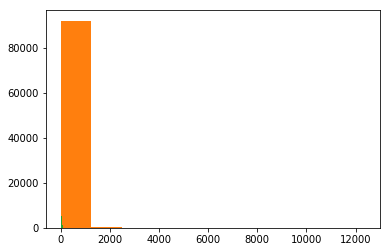

In [210]:
# look at review dist
plt.hist([math.log(x+1) for x in data_users.review_count])
print(plt.hist(data_users.review_count))
print(plt.hist(data_users.review_count[data_users.review_count<=100]))


(array([57240., 13248.,  5441.,  3004.,  2079.,  1514.,  1162.,   914.,
         758.,   693.]), array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]), <a list of 10 Patch objects>)


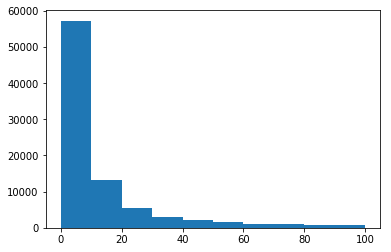

In [211]:
print(plt.hist(data_users.review_count[data_users.review_count<=100]))


In [9]:
# look at businesses
data_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Event Planning & Services,Grocery,Indian,Middle Eastern,Mediterranean,Asian Fusion,Ice Cream & Frozen Yogurt,Thai,Mexican,Pubs
0,C9oCPomVP0mtKa8z99E3gg,Bakery Gateau,"865 York Mills Road, Unit 1",Toronto,ON,M3B 1Y6,43.754093,-79.349548,4.5,8,...,0,0,0,0,0,0,0,1,0,0
1,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,1170 Queen Street W,Toronto,ON,M6J 1J5,43.642889,-79.425429,3.0,57,...,0,0,0,0,0,0,0,1,0,0
2,SP_YXIEwkFPPl_9anCYmpQ,The Steady Cafe & Bar,1051 Bloor Street W,Toronto,ON,M6H 1M4,43.660494,-79.432099,3.5,29,...,0,0,0,0,0,0,0,1,0,0
3,mlHC2XcU9Bows6cnYEmRgg,Mad Crush Wine Bar,582 College Street,Toronto,ON,M6G 1B3,43.655420,-79.413352,4.0,9,...,0,0,0,0,0,0,0,1,0,0
4,RFbMVekR8lU9tPJ8sWrwHg,Tavolino,619 Mount Pleasant Road,Toronto,ON,M4S 2M5,43.704229,-79.388230,4.0,18,...,0,0,0,0,0,0,0,1,0,0


In [122]:
data_business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'category', 'WiFi',
       'RestaurantsTakeOut', 'Alcohol', 'BikeParking',
       'RestaurantsReservations', 'OutdoorSeating', 'RestaurantsDelivery',
       'RestaurantsPriceRange2', 'RestaurantsAttire', 'NoiseLevel', 'HasTV',
       'RestaurantsGoodForGroups', 'GoodForKids', 'Coffee & Tea', 'Nightlife',
       'Bars', 'Specialty Food', 'Sandwiches', 'Breakfast & Brunch',
       'Canadian (New)', 'Cafes', 'Chinese', 'Italian', 'Bakeries', 'Pizza',
       'Japanese', 'Desserts', 'Fast Food', 'Burgers',
       'American (Traditional)', 'Sushi Bars', 'Event Planning & Services',
       'Grocery', 'Indian', 'Middle Eastern', 'Mediterranean', 'Asian Fusion',
       'Ice Cream & Frozen Yogurt', 'Thai', 'Mexican', 'Pubs'],
      dtype='object')

In [430]:
data_business.shape

(10093, 85)

In [123]:
data_business.category.head(20)

0                                        Bakeries, Food
1     Juice Bars & Smoothies, Food, Restaurants, Fas...
2     Restaurants, Nightlife, Breakfast & Brunch, Ve...
3     Restaurants, Breakfast & Brunch, Bars, Modern ...
4                                  Italian, Restaurants
5                         Tex-Mex, Mexican, Restaurants
6      Grocery, Restaurants, Steakhouses, Butcher, Food
7     Middle Eastern, Restaurants, Salad, Breakfast ...
8     Sandwiches, Cafes, Food, Restaurants, Coffee &...
9                               Sushi Bars, Restaurants
10    Desserts, Ice Cream & Frozen Yogurt, Food, Res...
11                              Restaurants, Vietnamese
12                        Soup, Restaurants, Sandwiches
13                    Food, Grocery, Convenience Stores
14    Restaurants, Breakfast & Brunch, Sandwiches, F...
15                     Meat Shops, Food, Specialty Food
16    Restaurants, Mexican, Ethnic Food, Specialty F...
17                    Sushi Bars, Japanese, Rest

In [431]:
data_business.describe()

,latitude,longitude,stars,review_count,Coffee & Tea,Nightlife,Bars,Specialty Food,Sandwiches,Breakfast & Brunch,...,Halal,Gluten-Free,Food Delivery Services,Wine Bars,Delis,Health Markets,Tea Rooms,Sports Bars,Gastropubs,Tapas/Small Plates
count,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,...,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000
mean,43.681057,-79.392436,3.464629,40.679976,0.085730,0.042937,0.041434,0.044661,0.046176,0.042146,...,0.014134,0.011574,0.012990,0.008203,0.012787,0.010787,0.013781,0.008029,0.011599,0.008941
std,0.046194,0.061268,0.761838,76.631472,0.243476,0.125094,0.123169,0.163826,0.184199,0.172326,...,0.121245,0.101253,0.120315,0.074128,0.121964,0.101473,0.129941,0.074040,0.121292,0.096226
min,43.592327,-79.703390,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.650806,-79.418194,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.664176,-79.393529,3.500000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.696332,-79.371987,4.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,43.876501,-79.137178,5.000000,2121.000000,1.062800,1.135335,0.770337,1.305053,1.364459,1.367786,...,2.111857,1.423607,2.149401,0.872972,2.190085,1.462638,2.197861,1.102882,2.205763,2.297511


In [166]:
data_business.astype(bool).sum(axis=0) # number of nonzeros

business_id                 10093
name                        10093
address                     10093
city                        10093
state                       10093
postal_code                 10093
latitude                    10093
longitude                   10093
stars                       10093
review_count                10093
category                    10093
WiFi                        10093
RestaurantsTakeOut          10093
Alcohol                     10093
BikeParking                 10093
RestaurantsReservations      9454
OutdoorSeating               9224
RestaurantsDelivery          9245
RestaurantsPriceRange2      10093
RestaurantsAttire           10093
NoiseLevel                  10093
HasTV                       10093
RestaurantsGoodForGroups    10093
GoodForKids                 10093
Coffee & Tea                 1368
Nightlife                    1162
Bars                         1111
Specialty Food                801
Sandwiches                    705
Breakfast & Br

(array([  54.,  152.,  517.,  957.,    0., 1897., 2632., 2497., 1132.,
         255.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

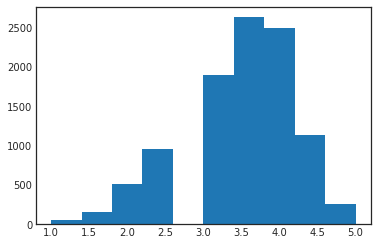

In [282]:
plt.hist(data_business.stars)

In [167]:
data_business.isnull().sum()

business_id                    0
name                           0
address                       58
city                           0
state                          0
postal_code                   38
latitude                       0
longitude                      0
stars                          0
review_count                   0
category                       0
WiFi                        3849
RestaurantsTakeOut          1889
Alcohol                     4127
BikeParking                 3560
RestaurantsReservations     3465
OutdoorSeating              3021
RestaurantsDelivery         3403
RestaurantsPriceRange2      1261
RestaurantsAttire           3754
NoiseLevel                  4476
HasTV                       4098
RestaurantsGoodForGroups    3316
GoodForKids                 3438
Coffee & Tea                   0
Nightlife                      0
Bars                           0
Specialty Food                 0
Sandwiches                     0
Breakfast & Brunch             0
          

In [293]:
# look at reviews
data_review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,year
0,AakkkTuGZA2KBodKi2_u8A,0.0,2012-07-16 00:37:14,0.693147,JVcjMhlavKKn3UIt9p9OXA,1.0,I cannot believe how things have changed in 3 ...,0.693147,TpyOT5E16YASd7EWjLQlrw,2012
1,YvrylyuWgbP90RgMqZQVnQ,0.0,2017-04-07 21:27:49,0.000000,svK3nBU7Rk8VfGorlrN52A,5.0,You can't really find anything wrong with this...,0.000000,NJlxGtouq06hhC7sS2ECYw,2017
2,y-Iw6dZflNix4BdwIyTNGA,0.0,2014-06-27 21:19:23,0.000000,4bUyL7lzoWzDZaJETAKREg,3.0,Good selection of classes of beers and mains. ...,0.000000,_N7Ndn29bpll_961oPeEfw,2014
3,YSUcHqlKMPHHJ_cTrqtNrA,0.0,2017-12-29 13:55:19,0.000000,E6B-2U2sGG3xgmnNWZAEew,1.0,Came here on a Thursday night at 6:30 p.m. My ...,0.000000,DbccYu3OppWKl21OanZnTg,2017
4,jzveTy7ogH7cg9axZ78ENg,0.0,2015-04-01 13:31:35,0.000000,0NRNA8qIq9nKw5FcwyOxcQ,4.0,Very nice eating environment and the food are ...,0.000000,54kpqrxF9DEPpwa51hO_Bw,2015


In [291]:
#check sparsity
n_users = data_review.user_id.unique().shape[0]
n_items = data_review.business_id.unique().shape[0]

print('Number of users: {}'.format(n_users))
print('Number of models: {}'.format(n_items))
print('Sparsity: {:4.3f}%'.format(float(data_review.shape[0]) / float(n_users*n_items) * 100))

Number of users: 92381
Number of models: 10093
Sparsity: 0.044%


In [35]:
data_review.text[0]

"I cannot believe how things have changed in 3 years. I picked up duck congee sometime in the winter when my hubby was sick.  I was very disappointed because the ginger fish sauce tasted like it had gone bad (it should never be bitter).  Today, my hubby wanted to eat there since he was craving the duck congee and most places don't serve the duck & coleslaw side. We waited about 10 minutes to get our menu.  After we placed our orders, we waited another 5 minutes to get the tea that most places bring with the menu.  I could go on with the details but the gist of the story is they were understaffed or the staff was slow.  The worst part of it was that the service.  The servers make us feel bad for asking for anything (like when they took our order).  We had arrived and placed our order before another couple bside us at least 10 minutes ahead but somehow, this couple received their pho before mine.  They were almost done eating their pho before mine came out."

In [36]:
data_review.describe()# need log cool,funny and useful

,cool,funny,stars,useful,year
count,422050.000000,422050.000000,422050.000000,422050.000000,422050.000000
mean,0.515505,0.376747,3.626194,1.108795,2015.000218
std,2.043843,1.550754,1.267724,2.670413,2.399685
min,0.000000,0.000000,1.000000,0.000000,2007.000000
25%,0.000000,0.000000,3.000000,0.000000,2013.000000
50%,0.000000,0.000000,4.000000,0.000000,2015.000000
75%,1.000000,0.000000,5.000000,1.000000,2017.000000
max,177.000000,193.000000,5.000000,188.000000,2018.000000


In [45]:
data_review.cool = pd.Series([math.log(x+1) for x in data_review.cool])
data_review.useful = pd.Series([math.log(x+1) for x in data_review.useful])
data_review.funny = pd.Series([math.log(x+1) for x in data_review.funny])


In [46]:
data_review.describe()

,cool,funny,stars,useful,year
count,422050.000000,422050.000000,422050.000000,422050.000000,422050.000000
mean,0.241465,0.174634,3.626194,0.484872,2015.000218
std,0.472046,0.422242,1.267724,0.629168,2.399685
min,0.000000,0.000000,1.000000,0.000000,2007.000000
25%,0.000000,0.000000,3.000000,0.000000,2013.000000
50%,0.000000,0.000000,4.000000,0.000000,2015.000000
75%,0.693147,0.000000,5.000000,0.693147,2017.000000
max,5.181784,5.267858,5.000000,5.241747,2018.000000


(array([3.16356e+05, 6.47680e+04, 2.98780e+04, 7.64300e+03, 2.55700e+03,
        3.81000e+02, 2.20000e+02, 1.39000e+02, 1.05000e+02, 3.00000e+00]),
 array([0.        , 0.51817836, 1.03635671, 1.55453507, 2.07271342,
        2.59089178, 3.10907013, 3.62724849, 4.14542684, 4.6636052 ,
        5.18178355]),
 <a list of 10 Patch objects>)

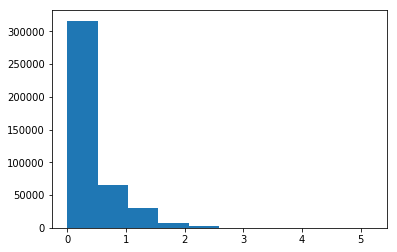

In [47]:
plt.hist(data_review.cool)# still very skewed

(array([3.46833e+05, 4.59420e+04, 2.03100e+04, 6.67700e+03, 1.42800e+03,
        5.28000e+02, 2.49000e+02, 7.50000e+01, 6.00000e+00, 2.00000e+00]),
 array([0.        , 0.52678582, 1.05357163, 1.58035745, 2.10714326,
        2.63392908, 3.1607149 , 3.68750071, 4.21428653, 4.74107234,
        5.26785816]),
 <a list of 10 Patch objects>)

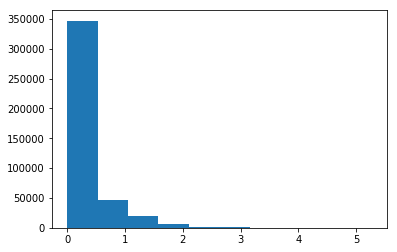

In [48]:
plt.hist(data_review.funny)

(array([2.32405e+05, 9.22760e+04, 6.44810e+04, 2.56480e+04, 5.18700e+03,
        1.41400e+03, 3.46000e+02, 1.60000e+02, 1.31000e+02, 2.00000e+00]),
 array([0.        , 0.5241747 , 1.0483494 , 1.5725241 , 2.09669881,
        2.62087351, 3.14504821, 3.66922291, 4.19339761, 4.71757231,
        5.24174702]),
 <a list of 10 Patch objects>)

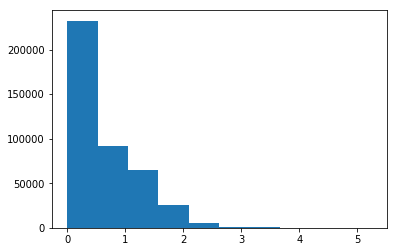

In [49]:
plt.hist(data_review.useful)

In [261]:
# look at dist of user ratings
data_review.stars.describe()

count    422050.000000
mean          3.626194
std           1.267724
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: stars, dtype: float64

(array([ 40368.,      0.,  43268.,      0.,      0.,  75500.,      0.,
        137539.,      0., 125375.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

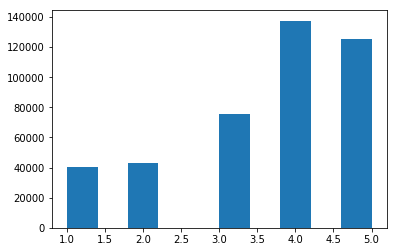

In [262]:
plt.hist(data_review.stars) # lots of 4 and 5s. 

In [115]:
#clean user skewness
data_users.describe()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,fans,funny,review_count,useful,year
count,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000
mean,3.559019,5.640803,0.310194,5.640803,3.748855,0.177894,0.582512,2.611922,1.876609,6.013931,0.425001,2.248677,40.669640,2.530250,31.681298,33.631807,70.635661,2013.552549
std,1.060362,133.675306,11.661069,133.675306,112.101491,9.290651,15.429126,44.738893,71.549861,125.363341,23.824390,45.181440,621.800074,25.105661,524.225249,137.028649,759.122721,2.514763
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2004.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2012.000000
50%,3.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,2014.000000
75%,4.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,4.000000,18.000000,16.000000,2015.000000
max,5.000000,23733.000000,2401.000000,23733.000000,23891.000000,2261.000000,3575.000000,4901.000000,12732.000000,11579.000000,5660.000000,7022.000000,82128.000000,2383.000000,86122.000000,12390.000000,89418.000000,2018.000000


In [432]:
# clean user skewness
data_users.review_count = pd.Series([math.log(x+1) for x in data_users.review_count])
data_users.useful =  pd.Series([math.log(x+1) for x in data_users.useful])

#cleam business skewness
data_business.review_count =  pd.Series([math.log(x+1) for x in data_business.review_count])

In [433]:
data_users.describe()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,Chicken Wings,Gastropubs,Diners,Gluten-Free,Thai,Comfort Food,Health Markets,Halal,Caterers,Arts & Entertainment
count,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,...,92381.000000,92381.00000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000
mean,3.559019,5.640803,0.310194,5.640803,3.748855,0.177894,0.582512,2.611922,1.876609,6.013931,...,0.013185,0.00381,0.017623,0.002349,0.074312,0.012546,0.000963,0.007880,0.024983,0.005412
std,1.060362,133.675306,11.661069,133.675306,112.101491,9.290651,15.429126,44.738893,71.549861,125.363341,...,0.114065,0.06161,0.131576,0.048409,0.262279,0.111304,0.031024,0.088422,0.156076,0.073370
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,23733.000000,2401.000000,23733.000000,23891.000000,2261.000000,3575.000000,4901.000000,12732.000000,11579.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [197]:
#look to see if has duplicated reviews
a = data_review.groupby(['business_id','user_id']).agg(['count']).reset_index()

In [231]:
tmp = a.useful.sort_values(by = 'count',ascending = False).reset_index()
tmp[tmp['count'] >1].shape # 10179 user has multiple review for one business

(10179, 2)

In [237]:
multi_review_user_idx = tmp[tmp['count'] >1]
multi_review_user_idx = multi_review_user_idx['index']
multi_review_user_idx

232869

In [289]:
idxx = 19
tmp = data_review[(data_review.user_id == a.loc[multi_review_user_idx[idxx],'user_id'][0]) &
           (data_review.business_id == a.loc[multi_review_user_idx[idxx],'business_id'][0])]
tmp = tmp.sort_values(by = 'date',ascending = True)# Have duplicate comment values. Not sure what would happen
tmp

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,year
404013,kAjCI0-7igmzWdsXbOuYWQ,0.0,2016-04-10 02:46:03,0.0,6XiJaLv0ukS33LKcSBXiSA,2.0,Gord and I had supper this evening at The Fox....,1.098612,O3pSxv1SyHpY4qi4Q16KzA,2016


In [250]:
tmp.text[162941]

"When the restaurant re-opened I was very excited. I love the convenience and their fresh pressed juices are delicious. I had hoped they would include 100% sustainable packaging and gluten free options. I no longer want to buy single use plastics. It is also no point offering a gluten free filling in a wrap, to people like myself who are intolerant. The menu items are good but there is room for improvement ... I order things fresh rather than from the cooler. I've been patient in waiting for them to get up to speed with their cleanses, etc. but by now they should be including their pricing and promotional materials (and glass bottles)! I feel there is so much potential here that isn't being realized yet. I'll continue to hope for improvements.\n\nHere is an update: I continue to enjoy their freshly made juices. They used to have some great winter drinks but they seem to be no longer on the menu. I am frustrated with the absence of gluten free bread despite mentioning it countless times

In [260]:
data_users[data_users.user_id == a.loc[multi_review_user_idx[idxx],'user_id'][0]]

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,fans,friends,funny,name,review_count,useful,user_id,yelping_since,is_elite,year
6886,3.38,19,0,19,12,0,1,21,12,36,...,34,"fUFOsx_h6eqNERByejrdng, QuZbJquRtbY9O9JrB9NpxQ...",281,Teena,1239,1321,O3pSxv1SyHpY4qi4Q16KzA,2010-07-04 02:52:05,True,2010


In [286]:
# take user latest rating as sole rating

for idxx in range(len(multi_review_user_idx)):
    tmp = data_review[(data_review.user_id == a.loc[multi_review_user_idx[idxx],'user_id'][0]) &
           (data_review.business_id == a.loc[multi_review_user_idx[idxx],'business_id'][0])].sort_values(
        by = 'date',ascending = True)
    
    data_review.drop(tmp.index[0:len(tmp.index)-1],inplace=True)
    

In [290]:
# check if all deleted
#look to see if has duplicated reviews
b = data_review.groupby(['business_id','user_id']).agg(['count']).reset_index()
tmp = b.useful.sort_values(by = 'count',ascending = False).reset_index()
tmp[tmp['count'] >1].shape # all deleted

(0, 2)

In [ ]:
# subtract user avg rating to count for bias and make neg to -1 and pos to 1

unique_users = data_review.user_id.unique()

for i,user in enumerate(unique_users):
    print(i)
    if(i == 0):
        continue
    # get avg rating
    this_avg = float(data_users.average_stars[data_users.user_id == user])
    # get user review mtrx
    tmp = data_review.stars[data_review.user_id == user] - this_avg
    tmp[tmp>0] = 1
    tmp[tmp<0] = -1
    data_review.stars[data_review.user_id == user] = tmp




In [319]:
data_review.stars.unique()

array([-1.,  1.,  0.])

In [320]:
# save this version of data_review
#data_review.to_csv('/Users/ivanchen/Desktop/MSIA/Courses/Blog/git/reviews_cleaned.csv')

In [306]:
# read in cleaned review data
data_review = pd.read_csv('/nfs/home/lcu1428/z/Rec/reviews_cleaned.csv',index_col=0)

In [14]:
# tmp = pd.pivot_table(data_review, values='stars', index=['user_id'],
#                     columns=['business_id'], aggfunc=np.sum,fill_value = 0)


In [18]:
#tmp.to_csv('/Users/ivanchen/Desktop/MSIA/Courses/Blog/git/interactions.csv')

In [576]:
# check user interactions distribution
tmp = data_review.groupby('user_id').count().reset_index()
tmp.describe() # many users do not have much interactions, a serious cold start problem as expected.

,business_id,cool,date,funny,review_id,stars,text,useful,year
count,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000
mean,4.445005,4.445005,4.445005,4.445005,4.445005,4.445005,4.445005,4.445005,4.445005
std,13.956706,13.956706,13.956706,13.956706,13.956706,13.956706,13.956706,13.956706,13.956706
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000


(array([6.3299e+04, 1.2207e+04, 8.1720e+03, 4.8940e+03, 2.1980e+03,
        1.0670e+03, 4.1000e+02, 1.1300e+02, 2.0000e+01, 1.0000e+00]),
 array([0.        , 0.71846292, 1.43692583, 2.15538875, 2.87385166,
        3.59231458, 4.31077749, 5.02924041, 5.74770332, 6.46616624,
        7.18462915]),
 <a list of 10 Patch objects>)

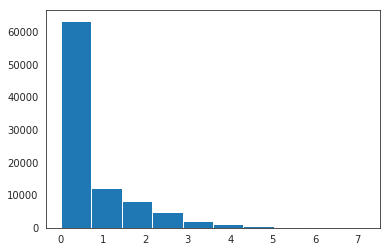

In [578]:
plt.hist(pd.Series([math.log(x) for x in tmp.useful])) # highly right skewed

In [572]:
data_review.columns

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text',
       'useful', 'user_id', 'year'],
      dtype='object')

In [435]:
#model establishment
dataset = Dataset()
dataset.fit(data_review.user_id,data_review.business_id)
type(dataset)
num_users, num_items = dataset.interactions_shape()
print('Num users: {}, num_items {}.'.format(num_users, num_items))


Num users: 92381, num_items 10093.


In [436]:
# fit item and user features. 


dataset.fit_partial(items=data_business.business_id,
                    item_features=['stars'])
# dataset.fit_partial(items=data_business.business_id,
#                     item_features=data_business.longitude)
# dataset.fit_partial(items=data_business.business_id,
#                     item_features=data_business.latitude)
dataset.fit_partial(items=data_business.business_id,
                    item_features=['review_count'])
# fit tags
# start_idx = 24
# for i in range(start_idx,len(data_business.columns)):
#     dataset.fit_partial(items=data_business.business_id,
#                     item_features=data_business[data_business.columns[i]])
tar_cols = [x for x in data_business.columns[24:]]

dataset.fit_partial(items = data_business.business_id,
                   item_features = tar_cols)                                    
                                                
# # dataset.fit_partial(users=data_users.user_id,
# #                     user_features=data_users.review_count)
# dataset.fit_partial(users=data_users.user_id,
#                     user_features=data_users.is_elite)
# # dataset.fit_partial(users=data_users.user_id,
# #                     user_features=data_users.useful)
# dataset.fit_partial(users=data_users.user_id,
#                     user_features=data_users.year)


user_cols = [x for x in data_users[['review_count', 'useful', 'is_elite',
                                   'Ice Cream & Frozen Yogurt', 'Korean', 'Tapas/Small Plates',
       'Vietnamese', 'Vegan', 'Caribbean', 'Food Delivery Services', 'Lounges',
       'Pubs', 'Greek', 'Cocktail Bars', 'Mexican', 'Wine Bars', 'Tea Rooms',
       'Delis', 'Vegetarian', 'Ethnic Food', 'Salad', 'Seafood', 'Beer',
       'American (New)', 'Juice Bars & Smoothies', 'Shopping', 'Barbeque',
       'Sports Bars', 'French', 'Chicken Wings', 'Gastropubs', 'Diners',
       'Gluten-Free', 'Thai', 'Comfort Food', 'Health Markets', 'Halal',
       'Caterers', 'Arts & Entertainment']]]
dataset.fit_partial(users=data_users.user_id,
                    user_features = user_cols)

# Check data
print(type(dataset))
print(dataset.model_dimensions())
print(dataset.user_features_shape())
print(dataset.item_features_shape())
#print(dataset.mapping())
print(dataset.interactions_shape())



<class 'lightfm.data.Dataset'>
(92420, 10156)
(92381, 92420)
(10093, 10156)
(92381, 10093)


In [437]:
# look at item feature mapping
a = dataset.mapping()[3]
list(a.items())[0:10]


[('AakkkTuGZA2KBodKi2_u8A', 0),
 ('YvrylyuWgbP90RgMqZQVnQ', 1),
 ('y-Iw6dZflNix4BdwIyTNGA', 2),
 ('YSUcHqlKMPHHJ_cTrqtNrA', 3),
 ('jzveTy7ogH7cg9axZ78ENg', 4),
 ('dZVMp70AuSa4dQPvx3J4ow', 5),
 ('r395lMbm1ihAQ2sMOcFKow', 6),
 ('TVLAvAFx0FqAkKGKHVjHpQ', 7),
 ('q8MUVVuQpfR6v0HBHmAFxw', 8),
 ('m-cg3stOStMAFEV9-8qnVw', 9)]

In [438]:
#build interaction
(interactions, weights) = dataset.build_interactions([(x['user_id'],
                                                       x['business_id'],
                                                       x['stars']) for index,x in data_review.iterrows()])

print(repr(interactions))

#item features
# item_info_copy=data_business.iloc[[i for i in range(data_business.shape[0]) 
#                                    if data_business.business_id[i] in data_review.business_id.unique()],:]
# print(item_info_copy.shape)
#item_features = dataset.build_item_features(((x['item'], [x['category']])
 #                                             for index,x in data_meta.iterrows()))
    

"""
Build a item features matrix out of an iterable of the form (item id, [list of feature names]) or (item id, {feature name: feature weight}).

Parameters:	
data (iterable of the form) – (item id, [list of feature names]) or (item id, {feature name: feature weight}). Item and feature ids will be translated to internal indices constructed during the fit call.
normalize (bool, optional) – If true, will ensure that feature weights sum to 1 in every row.
Returns:	
feature matrix – Matrix of item features.

Return type:	
CSR matrix (num items, num features)
"""    

<92381x10093 sparse matrix of type '<class 'numpy.int32'>'
	with 410634 stored elements in COOrdinate format>


'\nBuild a item features matrix out of an iterable of the form (item id, [list of feature names]) or (item id, {feature name: feature weight}).\n\nParameters:\t\ndata (iterable of the form) – (item id, [list of feature names]) or (item id, {feature name: feature weight}). Item and feature ids will be translated to internal indices constructed during the fit call.\nnormalize (bool, optional) – If true, will ensure that feature weights sum to 1 in every row.\nReturns:\t\nfeature matrix – Matrix of item features.\n\nReturn type:\t\nCSR matrix (num items, num features)\n'

In [439]:
# build user and item features

def build_dict(df,tar_cols,val_list):
    rst = {}
    for col in tar_cols:
        rst[col] = df[col]
    sum_val = sum(list(rst.values())) # get sum of all the tfidf values
    
    if(sum_val == 0):
        return rst
    else:
        
        w = (2-sum(val_list))/sum_val # weight for each tag to be able to sum to 1
        for key,value in rst.items():
            rst[key] = value * w
    return rst

def user_build_dict(df,tar_cols,val_list):
    rst = {}
    for col in tar_cols:
        rst[col] = df[col]
    sum_val = sum(list(rst.values())) # get sum of all the tfidf values
    
    if(sum_val == 0):
        return rst
    else:
        w = (2-sum(val_list))/sum_val # weight for each tag to be able to sum to 1
        for key,value in rst.items():
            rst[key] = value * w
    return rst

# get max of each column to regularize value to [0,1]
max_star = max(data_business.stars)
max_b_rc = max(data_business.review_count)
print('max_b_rc')
print(max_b_rc)

# give CF info weight 0.5, all other 0.5. Then in others, give (star, review count) 0.25 and tags 0.25
item_features = dataset.build_item_features(((x['business_id'], 
                                              {'stars':0.5*x['stars']/max_star,
                                               'review_count':0.5*x['review_count']/max_b_rc,
                                               **build_dict(x,tar_cols,[0.5*x['stars']/max_star,
                                                           0.5*x['review_count']/max_b_rc])})
                                              for index,x in data_business.iterrows()))


# user_features = dataset.build_user_features(((x['user_id'],
#                                              [x['is_elite'],x['year']])
#                                            for index, x in data_users.iterrows()))
max_u_rc = max(data_users.review_count)
max_useful = max(data_users.useful)
user_features = dataset.build_user_features(((x['user_id'],
                                             {'review_count':0.35*x['review_count']/max_u_rc,'is_elite':0.35*int(x['is_elite']),
                                              'useful':0.35*x['useful']/max_useful,
                                             **user_build_dict(x,user_cols,[0.35*x['review_count']/max_u_rc,
                                                                            0.35*int(x['is_elite']),
                                                                            0.35*x['useful']/max_useful])})
                                           for index, x in data_users.iterrows()))

print(repr(item_features))
print(item_features.shape)

print(repr(user_features))
print(user_features.shape)

max_b_rc
7.660114319173928
<10093x10156 sparse matrix of type '<class 'numpy.float32'>'
	with 645952 stored elements in Compressed Sparse Row format>
(10093, 10156)
<92381x92420 sparse matrix of type '<class 'numpy.float32'>'
	with 3695240 stored elements in Compressed Sparse Row format>
(92381, 92420)


In [440]:
# check features to see if weights make sense
idx = 3
tt = list(item_features[idx].nonzero())
print(item_features[idx].shape)
print(tt)

uu = list(user_features[idx].nonzero())
print(user_features[idx].shape)
uu

(1, 10156)
[array([0, 0, 0, 0], dtype=int32), array([    3, 10093, 10094, 10104], dtype=int32)]
(1, 92420)


[array([0, 0, 0, 0], dtype=int32),
 array([    3, 92381, 92382, 92395], dtype=int32)]

In [441]:
tt = item_features[idx].todense()
import pandas as pd
tt = pd.DataFrame(tt)
print(list(map(set,tt.values)))# feature weight sum to 1, so if two are nonzero, each take weight 0.5. 

uu = user_features[idx].todense()
uu = pd.DataFrame(uu)
list(map(set,uu.values))# feature weight sum to 1, so if two are nonzero, each take weight 0.5. 



[{0.0, 0.33333334, 0.4718746, 0.1, 0.094792075}]


[{0.0, 0.0883614, 0.12747854, 0.35058036, 0.4335797}]

In [442]:
tt

,0,1,2,3,4,5,6,7,8,9,...,10146,10147,10148,10149,10150,10151,10152,10153,10154,10155
0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [354]:
uu

,0,1,2,3,4,5,6,7,8,9,...,92410,92411,92412,92413,92414,92415,92416,92417,92418,92419
0,0.0,0.0,0.0,0.35058,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [580]:
#train-test split

# seed = 12345 #has multiple seeds set up to account for split biases
# seed = 101
# seed = 186
seed = 123
from lightfm.cross_validation import random_train_test_split
train,test=random_train_test_split(interactions,test_percentage=0.2,random_state=np.random.RandomState(seed))

print('The dataset has %s users and %s items, '
      'with %s interactions in the test and %s interactions in the training set.'
      % (train.shape[0], train.shape[1], test.getnnz(), train.getnnz()))

train.multiply(test).nnz == 0 # make sure train and test are truly disjoint

The dataset has 92381 users and 10093 items, with 82127 interactions in the test and 328507 interactions in the training set.


True

In [594]:
#model construction

from lightfm import LightFM

# Set the number of threads; you can increase this if you have more physical cores available.

## These parameters are obtained after tunning for specific loss through skopt in the bottom chunk
NUM_THREADS = 25
NUM_COMPONENTS = 43    
NUM_EPOCHS = 18
ITEM_ALPHA = 2.88752e-6
learning_rate=0.06652
k = 5 # for precision at k

## Pure Collaborative Filtering models

# Logistic loss
model = LightFM(loss='logistic',random_state=seed,
                item_alpha=ITEM_ALPHA,
               no_components=NUM_COMPONENTS,
               learning_rate=learning_rate)

# time it.
%time model = model.fit(train,epochs=NUM_EPOCHS,num_threads=NUM_THREADS)


# Import the evaluation routines
from lightfm.evaluation import auc_score

# Compute and print the AUC score
train_auc = auc_score(model, train, num_threads=NUM_THREADS).mean()
print('Collaborative filtering train AUC: %s' % train_auc)

# We pass in the train interactions to exclude them from predictions.
# This is to simulate a recommender system where we do not
# re-recommend things the user has already interacted with in the train
# set.


test_auc = auc_score(model, test,num_threads=NUM_THREADS).mean()
print('Collaborative filtering test AUC: %s' % test_auc)

from lightfm.evaluation import precision_at_k,recall_at_k

print("Train precision: %.4f" % precision_at_k(model, train, k=k,num_threads=NUM_THREADS).mean())
print("Test precision: %.4f" % precision_at_k(model, test,train_interactions=train, k=k,num_threads=NUM_THREADS).mean())



CPU times: user 1min 8s, sys: 8.73 s, total: 1min 16s
Wall time: 3.27 s
Collaborative filtering train AUC: 0.8313436
Collaborative filtering test AUC: 0.82235026
Train precision: 0.0139
Test precision: 0.0082


In [595]:
#test corresponding recpmmendation
#transfer data_movies to have corresponding movieid with ratings
# rf.sample_train_recommendation(model,train,data_business,range(10),5,'name',mapping=dataset.mapping()[2],tag='category')

# user_index=list(set(rf.get_user_index(test)))
# rf.sample_test_recommendation(model,train,test,data_business,user_index[0:10],5,'name',mapping=dataset.mapping()[2],train_interactions=train,tag='category')


In [596]:
NUM_THREADS = 25
NUM_COMPONENTS = 45    
NUM_EPOCHS = 43
ITEM_ALPHA = 1.3846e-6
learning_rate=0.0161445

# BPR loss
model = LightFM(loss='bpr',random_state=seed,
                item_alpha=ITEM_ALPHA,
               no_components=NUM_COMPONENTS,
               learning_rate=learning_rate)

# time it.
%time model = model.fit(train,epochs=NUM_EPOCHS,num_threads=NUM_THREADS)


# Compute and print the AUC score
train_auc = auc_score(model, train, num_threads=NUM_THREADS).mean()
print('Collaborative filtering train AUC: %s' % train_auc)

test_auc = auc_score(model, test,num_threads=NUM_THREADS).mean()
print('Collaborative filtering test AUC: %s' % test_auc)

print("Train precision: %.4f" % precision_at_k(model, train, k=k,num_threads=NUM_THREADS).mean())
print("Test precision: %.4f" % precision_at_k(model, test,train_interactions=train, k=k,num_threads=NUM_THREADS).mean())


CPU times: user 3min 9s, sys: 36.7 s, total: 3min 46s
Wall time: 9.49 s
Collaborative filtering train AUC: 0.907694
Collaborative filtering test AUC: 0.63284343
Train precision: 0.1257
Test precision: 0.0075


In [597]:
NUM_THREADS = 25
NUM_COMPONENTS = 21    
NUM_EPOCHS = 16
ITEM_ALPHA = 5.97967e-6
learning_rate=0.033

# Let's fit a WARP model
model = LightFM(loss='warp',random_state=seed,
                item_alpha=ITEM_ALPHA,
               no_components=NUM_COMPONENTS,
               learning_rate=learning_rate)

#  time it.
%time model = model.fit(train,epochs=NUM_EPOCHS,num_threads=NUM_THREADS)



# Compute and print the AUC score
train_auc = auc_score(model, train, num_threads=NUM_THREADS).mean()
print('Collaborative filtering train AUC: %s' % train_auc)

test_auc = auc_score(model, test,num_threads=NUM_THREADS).mean()
print('Collaborative filtering test AUC: %s' % test_auc)


print("Train precision: %.4f" % precision_at_k(model, train, k=k,num_threads=NUM_THREADS).mean())
print("Test precision: %.4f" % precision_at_k(model, test,train_interactions=train, k=k,num_threads=NUM_THREADS).mean())


CPU times: user 57.8 s, sys: 11.8 s, total: 1min 9s
Wall time: 2.97 s
Collaborative filtering train AUC: 0.9601078
Collaborative filtering test AUC: 0.8341908
Train precision: 0.0584
Test precision: 0.0108


In [598]:
NUM_THREADS = 25
NUM_COMPONENTS = 30
learning_rate = 0.0053
NUM_EPOCHS = 6
ITEM_ALPHA = 2.228e-5

## Hybrid models

#Combine user_feature and item feature

#logistic loss
model.iii = LightFM(loss='logistic',
                item_alpha=ITEM_ALPHA,
                    random_state=seed,
               no_components=NUM_COMPONENTS)

# time it.
%time model.iii = model.iii.fit(train,user_features=user_features,item_features=item_features,epochs=NUM_EPOCHS,num_threads=NUM_THREADS)

# Compute and print the AUC score
train_auc = auc_score(model.iii, train,user_features=user_features,item_features=item_features, num_threads=NUM_THREADS).mean()
print(' Hybrid train AUC: %s' % train_auc)

test_auc = auc_score(model.iii, test,user_features=user_features,item_features=item_features,num_threads=NUM_THREADS).mean()
print('Hybrid test AUC: %s' % test_auc)

#precision @k
print("Train precision: %.4f" % precision_at_k(model.iii, train,
                                               item_features=item_features,user_features=user_features, k=k,
                                               num_threads=NUM_THREADS).mean())
print("Test precision: %.4f" % precision_at_k(model.iii, test,train_interactions=train,
                                              item_features=item_features,user_features=user_features, k=k,
                                             num_threads=NUM_THREADS).mean())


CPU times: user 1h 19min 11s, sys: 21.9 s, total: 1h 19min 33s
Wall time: 3min 29s
 Hybrid train AUC: 0.73417795
Hybrid test AUC: 0.73545223
Train precision: 0.0029
Test precision: 0.0017


In [599]:

NUM_THREADS = 25
NUM_COMPONENTS = 77    
NUM_EPOCHS = 80
ITEM_ALPHA = 1.419e-6
learning_rate=0.035


# BPR
model.iii = LightFM(loss='bpr',
                item_alpha=ITEM_ALPHA,
                     random_state=seed,
               no_components=NUM_COMPONENTS)

#  time it.
%time model.iii = model.iii.fit(train,user_features=user_features,item_features=item_features,epochs=NUM_EPOCHS,num_threads=NUM_THREADS)


# Compute and print the AUC score
train_auc = auc_score(model.iii, train,user_features=user_features,item_features=item_features, num_threads=NUM_THREADS).mean()
print('Hybrid train AUC: %s' % train_auc)

test_auc = auc_score(model.iii, test,user_features=user_features,item_features=item_features,num_threads=NUM_THREADS).mean()
print('Hybrid test AUC: %s' % test_auc)

#precision @k
print("Train precision: %.4f" % precision_at_k(model.iii, train,
                                               item_features=item_features,user_features=user_features, k=k,
                                              num_threads=NUM_THREADS).mean())
print("Test precision: %.4f" % precision_at_k(model.iii, test,train_interactions=train,
                                              item_features=item_features,user_features=user_features, k=k,
                                             num_threads=NUM_THREADS).mean())


CPU times: user 1d 11h 9min 13s, sys: 5min 33s, total: 1d 11h 14min 47s
Wall time: 1h 40min 5s
Hybrid train AUC: 0.9631361
Hybrid test AUC: 0.795227
Train precision: 0.0142
Test precision: 0.0037


In [609]:
NUM_THREADS = 25
NUM_COMPONENTS = 42    
NUM_EPOCHS = 14
ITEM_ALPHA = 0.000256
learning_rate=0.0529
# WARP
model.iii = LightFM(loss='warp',
                item_alpha=ITEM_ALPHA, random_state=seed,
               no_components=NUM_COMPONENTS)

#time it.
%time model.iii = model.iii.fit(train,user_features=user_features,item_features=item_features,epochs=NUM_EPOCHS,num_threads=NUM_THREADS)



# Compute and print the AUC score
train_auc = auc_score(model.iii, train,user_features=user_features,item_features=item_features, num_threads=NUM_THREADS).mean()
print('Hybrid train AUC: %s' % train_auc)

test_auc = auc_score(model.iii, test,user_features=user_features,item_features=item_features,num_threads=NUM_THREADS).mean()
print('Hybrid test AUC: %s' % test_auc)

#precision @k
print("Train precision: %.4f" % precision_at_k(model.iii, train,
                                               item_features=item_features,user_features=user_features, k=k,
                                              num_threads=NUM_THREADS).mean())
print("Test precision: %.4f" % precision_at_k(model.iii, test,train_interactions=train,
                                              item_features=item_features,user_features=user_features, k=k,
                                             num_threads=NUM_THREADS).mean())


CPU times: user 3h 52min 14s, sys: 53.1 s, total: 3h 53min 7s
Wall time: 10min 25s
Hybrid train AUC: 0.9476545
Hybrid test AUC: 0.8872026
Train precision: 0.0329
Test precision: 0.0175


In [601]:
# a = precision_at_k(model.iii, train, k=5,user_features=user_features,item_features=item_features)

# b = precision_at_k(m odel.iii, test,train_interactions=train,k=5,user_features=user_features,item_features=item_features)


In [628]:
#test corresponding recpmmendation

rf.sample_train_recommendation(model.iii,train,data_business,[74],5,'name',mapping=dataset.mapping()[2],tag='category',
                              user_features = user_features,item_features=item_features)
user_index=list(set(rf.get_user_index(test)))
rf.sample_test_recommendation(model.iii,train,test,data_business,[user_index[46]],5,'name',mapping=dataset.mapping()[2],
                              train_interactions=train,tag='category',user_features = user_features,item_features=item_features)


**User 74**

**Known positives:**

 O.Noir | Canadian (New), American (New), Restaurants
 Striker | American (Traditional), Gay Bars, Bars, Lounges, Sports Bars, Nightlife, Restaurants
 Campagnolo | Restaurants, Italian, Tapas/Small Plates
 Thobors Boulangerie Patisserie Café | Food, Bakeries, Coffee & Tea, Desserts, Specialty Food, Macarons
 Jugo Juice | Food, Juice Bars & Smoothies
 Alexandros Take-Out | Restaurants, Greek
 Grasslands | Bars, Lounges, Restaurants, Nightlife, Vegan, Modern European
 Pattaya Thai Kitchen | Restaurants, Thai
 Rosebud | Canadian (New), Restaurants, American (New)
 The Kosher Gourmet | Sushi Bars, Ethnic Food, Kosher, Restaurants, Food, Specialty Food, Imported Food
 Freshii | Vegetarian, Restaurants
 Beach Bird Restaurant | Canadian (New), American (New), Restaurants


**Recommended:**

 Caldense & Bakery | Bakeries, Coffee & Tea, Desserts, Food
 Junked Food Co | Food, Ice Cream & Frozen Yogurt, Sandwiches, Pizza, Restaurants, Food Delivery Services
 Rice & Noodle | Local Services, Couriers & Delivery Services, Restaurants, Food, Specialty Food, Chinese, Ethnic Food
 Jugo Juice | Food, Juice Bars & Smoothies
This one clicked
 Alexandros Take-Out | Restaurants, Greek
This one clicked


*k_p: 12*

*precicion at k : 0.4*

----------------------------------------------------------------------


**User 60**

length of known_positives: 1
not enough known positives, return max number


**Known positives:**

 Lardon Restaurant | Restaurants, French, Italian


**Recommended:**

 Desi Hut Takeout & Catering | Pakistani, Indian, Restaurants, Halal
 Liberty Shawarma | Salad, Restaurants, Sandwiches, Fast Food
 Pearl King | Dim Sum, Chinese, Tapas/Small Plates, Restaurants
 Room Service Toronto | Caribbean, Restaurants
 House-Maison | Restaurants, Canadian (New), American (Traditional)


*k_p: 1*

*precicion at k : 0.0*

----------------------------------------------------------------------


In [603]:
# get similar tags
def get_similar_tags(model, tag_id,k):
    # Define similarity as the cosine of the angle
    # between the tag latent vectors

    # Normalize the vectors to unit length
    tag_embeddings = (model.item_embeddings[10095:].T
                      / np.linalg.norm(model.item_embeddings[10095:], axis=1)).T

    query_embedding = tag_embeddings[tag_id]
    similarity = np.dot(tag_embeddings, query_embedding)
    most_similar = np.argsort(-similarity)[1:k+1]

    return most_similar


tag_labels = list(dataset.mapping()[3].keys())[10095:]


target_ls = ['Chinese','Bars','Fast Food','Ice Cream & Frozen Yogurt']
for tag in target_ls:
    tag_id = tag_labels.index(tag)
    print('Most similar tags for %s: %s' % (tag_labels[tag_id],
                                            [tag_labels[x] for x in get_similar_tags(model.iii, tag_id,5)]))




Most similar tags for Chinese: ['Japanese', 'Asian Fusion', 'Tea Rooms', 'Ethnic Food', 'Sushi Bars']
Most similar tags for Bars: ['Nightlife', 'Canadian (New)', 'Cocktail Bars', 'Lounges', 'Wine Bars']
Most similar tags for Fast Food: ['Burgers', 'Chicken Wings', 'American (Traditional)', 'Grocery', 'Sandwiches']
Most similar tags for Ice Cream & Frozen Yogurt: ['Desserts', 'Bakeries', 'Tea Rooms', 'Cafes', 'Fast Food']


+------------+------------+------------+------------+------------+
|   Epoch    | train p@5  | train_auc  |  test p@5  |  test_auc  |
+============+============+============+============+============+
|     5      |  0.11873   |  0.97607   |  0.01018   |  0.82118   |
+------------+------------+------------+------------+------------+
|     10     |  0.21914   |  0.99607   |  0.01038   |  0.80537   |
+------------+------------+------------+------------+------------+
|     15     |  0.25575   |  0.99837   |  0.01052   |  0.78931   |
+------------+------------+------------+------------+------------+
|     20     |  0.27233   |  0.99893   |  0.01039   |  0.77903   |
+------------+------------+------------+------------+------------+
|     25     |  0.28164   |  0.99916   |  0.01034   |  0.77209   |
+------------+------------+------------+------------+------------+
|     30     |  0.28720   |  0.99929   |  0.01031   |  0.76653   |
+------------+------------+------------+------------+---------

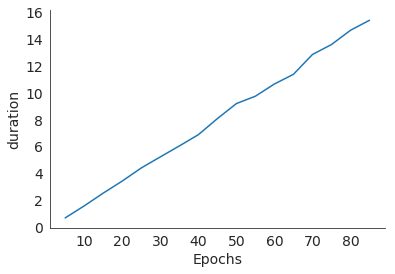

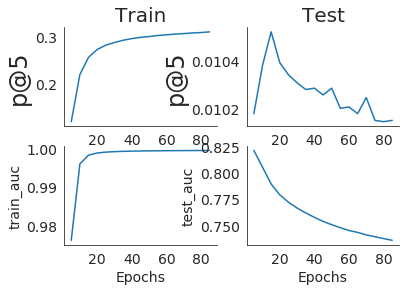

In [604]:
#Tunning Hyperparameters
NUM_THREADS = 28
NUM_COMPONENTS = 42    
NUM_EPOCHS = 14
ITEM_ALPHA = 0.000256
learning_rate=0.0529

iterarray = range(5, 90, 5)

#Initialize model.
model = LightFM(loss='warp',random_state=123,
                item_alpha=ITEM_ALPHA,
               no_components=NUM_COMPONENTS,
               learning_rate=learning_rate)
model.fit(train, epochs=0);

model, train_patk, test_patk,warp_duration,train_warp_auc,test_warp_auc = rf.patk_learning_curve(
    model, train, test, iterarray, k=5, **{'num_threads': num_thread}
)#why every time it outputs different values?


# ## Hybrid model
# model.iii= LightFM(loss='warp',random_state=123,
#                 item_alpha=ITEM_ALPHA,
#                no_components=NUM_COMPONENTS, learning_rate=learning_rate)

# # Run 3 epochs and time it.
# %time model.iii= model.iii.fit(train,item_features=item_features,user_features = user_features,epochs=0)

# model.iii, train_patk, test_patk,warp_duration,train_warp_auc,test_warp_auc = rf.patk_learning_curve(
#     model.iii, train, test, iterarray,item_features=item_features,user_features=user_features, k=5, **{'num_threads': num_thread}
# )#why every time it outputs different values?



#plot curves
import seaborn as sns
sns.set_style('white')
#plot duration
ax = plt.subplot(1, 1, 1)
fig = ax.get_figure();
sns.despine(fig);
rf.plot_vec(iterarray,warp_duration,'duration')
plt.show()
# Plot train on left
ax = plt.subplot(2, 2, 1)
fig = ax.get_figure();
sns.despine(fig);
rf.plot_patk(iterarray, train_patk,
         'Train', k=5)
ax = plt.subplot(2, 2, 3)
fig = ax.get_figure();
sns.despine(fig);
rf.plot_vec(iterarray,train_warp_auc,'train_auc')


# Plot test on right
ax = plt.subplot(2, 2, 2)
fig = ax.get_figure();
sns.despine(fig);
rf.plot_patk(iterarray, test_patk,
         'Test', k=5)

ax = plt.subplot(2, 2, 4)
fig = ax.get_figure();
sns.despine(fig);
rf.plot_vec(iterarray,test_warp_auc,'test_auc')

plt.show();

# #Using sk-learn optimizer
from scipy.optimize import brute
from skopt import forest_minimize,gbrt_minimize,dummy_minimize
from skopt import callbacks


#for model include item_Features
def objective(params):
    # unpack
    epochs, learning_rate,\
    no_components, alpha = params
    
    user_alpha = alpha
    item_alpha = alpha
    model.iii = LightFM(loss='logistic',
                    random_state=123,
                    learning_rate=learning_rate,
                    no_components=no_components,
                    user_alpha=user_alpha,
                    item_alpha=item_alpha)
    model.iii.fit(train, epochs=epochs,
              num_threads=num_thread,
                  item_features=item_features
                  ,user_features=user_features,
                   verbose=True)
    
    patks = auc_score(model.iii, test,
                           train_interactions=train,
                           item_features=item_features
                      ,user_features = user_features,
                       num_threads=num_thread).mean()
#     mapatk = np.mean(patks)
    # Make negative because we want to _minimize_ objective
#     out = -mapatk
    out = -patks
    # Handle some weird numerical shit going on
    if np.abs(out + 1) < 0.01 or out < -1.0:
        return 0.0
    else:
        return out

space = [(10, 40), # epochs
         (0.001, 0.04, 'log-uniform'), # learning_rate
         (15, 40), # no_components
         (10**-6, 0.1, 'log-uniform'), # alpha
        ]

try:
    res_fm = forest_minimize(objective, space, n_calls=30,
                     random_state=123,base_estimator= 'RF',acq_func='PI',
                     verbose=True, n_jobs=num_thread)
#         checkpoint_callback = callbacks.CheckpointSaver("/result.pkl")
#         res_fm = dummy_minimize(objective, space, n_calls=30,
#                  random_state=123,
#                  verbose=True)
#                                 ,callback=[checkpoint_callback])
except ValueError:
    print('Forest diverged, random search intialized')
    res_fm = dummy_minimize(objective, space, n_calls=30,
         random_state=123,
         verbose=True)

print('Maximimum auc found: {:6.5f}'.format(-res_fm.fun))
print('Optimal parameters:')
params = ['epochs', 'learning_rate', 'no_components', 'alpha']
for (p, x_) in zip(params, res_fm.x):
    print('{}: {}'.format(p, x_))
from skopt.plots import plot_convergence
plot_convergence(res_fm);
